<a href="https://colab.research.google.com/github/b19630/clustering-/blob/main/Hierarchical_Clustering_on_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch #.hierarchy use for dendogram creation 
from sklearn.cluster import AgglomerativeClustering 
import numpy as np #importing numpy for scientific calculation 
import pandas as pd #importing pandas library for data handling and manipulation
#importing pyplot module from matplotlib for data visualization including seaborn as sns 
from matplotlib import pyplot as plt 
import seaborn as sn
data1 = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv") #reading csv file https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

In [2]:
data1 #printing dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
def norm_func(i): #function for normalization of values 
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_normal = norm_func(data1.iloc[:,:-2]) #creating object and passing dataset
df_normal #printing the normalized values 

,sepal_length,sepal_width,petal_length
0,0.222222,0.625000,0.067797
1,0.166667,0.416667,0.067797
2,0.111111,0.500000,0.050847
3,0.083333,0.458333,0.084746
4,0.194444,0.666667,0.067797
...,...,...,...
145,0.666667,0.416667,0.711864
146,0.555556,0.208333,0.677966
147,0.611111,0.416667,0.711864
148,0.527778,0.583333,0.745763


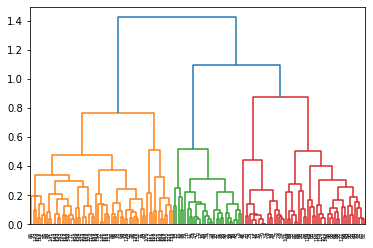

In [4]:
dendrogram = sch.dendrogram(sch.linkage(df_normal, method='complete')) #creating a dendogram
#from scipy.cluster.hierarchy we have imported dendogram and giving normalized data that we have created 
#and linkage we have used is complete(maximum) linkage 

In [5]:
# create clusters
#AgglomerativeClustering object name and passing argument such as 
#n_clusters=5 total 5 cluster want(note:-consult by domain expert)
#affinity = 'euclidean' the measure we have used 
#and the linkage is linkage = 'complete'(maximum)
irisss = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [6]:
irisss.fit(df_normal)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [7]:
# save clusters for chart
y_irisss = irisss.fit_predict(df_normal)  #here it predict the clusters 
# Clusters=pd.DataFrame(y_irisss,columns=['Clusters'])

In [8]:
y_irisss #printing the clusters

array([2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [12]:
 data1['cluster'] = y_irisss #created a new column and assing values data1['Address'] = y_irisss

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [14]:
irisss1=data1.sort_values("cluster") #created a new column and assing clusters values 
irisss1.iloc[:,[-3,-1]] #printing the dataset

,petal_width,cluster
96,1.3,0
62,1.0,0
106,1.7,0
34,0.1,0
35,0.2,0
...,...,...
44,0.4,2
46,0.2,2
48,0.2,2
22,0.2,2
